In [ ]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk

In [ ]:
tiktok = pd.read_csv("tiktok_beacukai_raw.csv")

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply
17109,pantatbelerang,pantatbelerang,@Bea Cukai RI 😆,2024-04-30T07:17:47,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False
13464,fauzirama15,fauzirama,jahat anjayyy ngerii,2024-05-04T14:19:20,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False
11963,sindy1408_,Sindy_14🍓,Bikin Malu Bnr Bnr,2024-05-08T21:55:14,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False
14627,musafiralways,Gang Doli,lah iya mengapa mereka yang jadi pahlawan🗿,2024-05-01T16:21:44,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False
15417,jinjahanam99,jinjahanam99,urusan soal aparat yg aneh2 boleh ni netizen y...,2024-04-30T23:59:00,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False
232,rumah_ken_kai,Rumah Ken Kai,The power of viral,2024-04-30T03:11:08,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,True
13277,mbih_hasbih,Hasbi Assidiki,kan kan kan viral dulu,2024-05-05T02:59:05,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False
3,rtu_0192,Mosquito,sampai menterinya turun tangan,2024-04-28T17:02:33,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False
7652,.remaja_olshop,haris_sopian98,PIALA LOMBA NYANYI D JEPANG YG DI KASIH PAJAK ...,2024-04-28T19:25:43,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False
6814,dimasbe09,Dimas.,emang sampe 30an juta ya..?,2024-04-29T00:25:43,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False


In [ ]:
def remove_pattern(comment, pattern):

    r = re.findall(pattern, str(comment))

    for i in r:
        comment = re.sub(i, '', str(comment))

    return comment

tiktok['clean_comment'] = np.vectorize(remove_pattern)(tiktok['comment'], "@[\w]*")

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment
8948,naww996,naww996,Jgn2 si princes ini anak ya beacukai 🤣,2024-05-06T01:53:03,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,Jgn2 si princes ini anak ya beacukai 🤣
4945,andrylins28,andry lin's,"gw beli sparepart music aja kena bea cukai, pr...",2024-04-30T01:35:55,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,"gw beli sparepart music aja kena bea cukai, pr..."
12639,mx_relaxa,ブリアン,Konoha emang beda🤣,2024-05-10T20:23:18,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,Konoha emang beda🤣
3965,user9134504972070,user9134504972070,tetep ga masuk akal denda sampe segitu😅,2024-05-03T13:30:32,https://p16-sign-va.tiktokcdn.com/musically-ma...,0,False,tetep ga masuk akal denda sampe segitu😅
3398,randiafrimal,R@NDI.AFRIMAL.,ibuk ini bagus kerja nya,2024-05-05T18:24:22,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,ibuk ini bagus kerja nya
9525,perdajoean,DAJOE,"jgn pake emot ini bang 😂, pake emot ini aja 😡",2024-05-04T06:31:06,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"jgn pake emot ini bang 😂, pake emot ini aja 😡"
18015,anakdewazeus11,Angin ribut,rugi itu pasti anak bininya gak jadi makan enak,2024-04-30T05:41:10,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,rugi itu pasti anak bininya gak jadi makan enak
8062,jimijack86,JimiJack,intinya sepatu itu dah diterima toh.,2024-04-28T16:18:55,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,intinya sepatu itu dah diterima toh.
7302,wanreo,New Wanreo Fernando,persoal ny ad pada pegawai ibu btuh d bina bia...,2024-04-28T22:38:09,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,persoal ny ad pada pegawai ibu btuh d bina bia...
11932,robychristiawan86,robychristiawan86,mana ada urat malu nya udah pada putus terang ...,2024-05-11T06:40:56,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,mana ada urat malu nya udah pada putus terang ...


In [ ]:
def remove_punctuation(text):

    text_with_spaces = ''.join([char if char not in string.punctuation else ' ' for char in text])

    words_without_punct = [word for word in text_with_spaces.split() if word]

    cleaned_text = ' '.join(words_without_punct)

    return cleaned_text


tiktok['clean_comment'] = tiktok['clean_comment'].apply(lambda x : remove_punctuation(x))

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment
13598,cortt40,Cortt,akhirnya ada yg nyadar mereka nyengir,2024-05-04T05:52:44,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,akhirnya ada yg nyadar mereka nyengir
13395,alee_ale2,ashwgw,"BENER BANGET GADA MALUNYA, PATUT DI PECAT DIKU...",2024-05-04T18:50:12,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,BENER BANGET GADA MALUNYA PATUT DI PECAT DIKUC...
9984,agustinasudrajatr,AgustinaSudrajatRatih,"banyakkk kak,, barang2 PMI buktinya😫",2024-04-30T03:36:19,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,banyakkk kak barang2 PMI buktinya😫
7175,calonayahsaja,triglavshop,halah...,2024-04-28T23:08:44,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,halah
15311,hopeparfum,Hope Perfume,budaya muka tembok,2024-05-01T01:50:46,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,budaya muka tembok
12981,wayjurai,love yourself first❤️,Jadi di china gak ada yg namanya korubsi,2024-05-06T03:30:24,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,Jadi di china gak ada yg namanya korubsi
13845,gol_d.rull,β-Phenicilin,SUSAH BANGET CUMA BILANG MAAF MINIMAL RASA MAL...,2024-05-03T22:19:08,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,SUSAH BANGET CUMA BILANG MAAF MINIMAL RASA MAL...
7236,mamabianca213,mamabianca21,"Gw suka bgt sama inu sri, tapi untuk anakbuahn...",2024-04-28T22:54:29,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,Gw suka bgt sama inu sri tapi untuk anakbuahny...
13856,mamang_batman,si paling langit,@beacukairi 😅😅😅😅😅,2024-05-03T21:53:08,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,😅😅😅😅😅
2086,erayuni4,yun,"bkn itu masalah nya ,brp pasang sepatu,sepasan...",2024-05-20T07:30:08,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,bkn itu masalah nya brp pasang sepatu sepasang...


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F92D"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

tiktok['clean_comment'] = tiktok['clean_comment'].apply(remove_emoji)

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment
3386,vaniaafif,VaniaAfif,🤣,2024-05-05T23:30:25,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,
4646,fabiansunanto,fabian sunanto,kenapa gak sekalian presiden klarifikasi.terus...,2024-04-30T13:13:43,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,kenapa gak sekalian presiden klarifikasi terus...
8775,bhadspampel,DsPampel,??,2024-04-28T14:16:09,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,
9111,sudars0_,SUDARSO,"ASN itu mindset nya harus diubah, dia dibayar ...",2024-05-04T09:07:46,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,True,ASN itu mindset nya harus diubah dia dibayar n...
17150,pantatbelerang,pantatbelerang,@Bea Cukai RI 😃😅😃,2024-04-30T07:15:12,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,Cukai RI
996,mr.marimo01,Marimo,kocak😂,2024-05-19T06:15:19,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,kocak
6543,jantan.coboy,jantan coboy,info loker buk😁,2024-04-29T01:25:40,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,info loker buk
11515,eonni22,langit,udah pindah ke dengkul...,2024-04-30T04:14:13,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,udah pindah ke dengkul
590,wonton0205,binton,iya tau tapi kenapa harus sri mulyani nya gitu...,2024-04-29T07:36:27,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,iya tau tapi kenapa harus sri mulyani nya gitu...
3056,backhrii,fahri,koin medy,2024-05-11T14:59:40,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,koin medy


In [ ]:
def cleaning(string):

    string = re.sub(r'\$\w*', '', string)         #digunakan untuk menghapus semua kata yang dimulai dengan tanda dolar ($) dan diikuti oleh karakter huruf, angka, atau garis bawah.      #
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', string)     #untuk menghapus semua URL atau tautan web dari teks.
    string = re.sub('&quot;'," ", string)         #Digunakan untuk menggantikan setiap kemunculan `&quot;` dengan spasi kosong dalam kolom `text`.
    string = re.sub(r"\d+", " ", str(string))         #digunakan untuk menggantikan semua angka dalam teks yang disimpan dalam kolom `text` dengan spasi kosong.
    string = re.sub(r"\b[a-zA-Z]\b", "", str(string))     #digunakan untuk menghapus semua kata tunggal dalam teks yang disimpan dalam kolom `text`.
    string = re.sub(r"[^\w\s]", " ", str(string))         #digunakan untuk menggantikan semua karakter non-alphanumerik dan non-spasi dalam teks yang disimpan dalam variabel `content` dengan spasi kosong.
    string = re.sub(r'(.)\1+', r'\1\1', string)         #Digunakan untuk mengganti dua atau lebih karakter berulang dalam teks dengan hanya dua karakter yang berulang. Misalnya, jika terdapat karakter berulang "eeeee" dalam teks, maka akan digantikan dengan "ee".
    string = re.sub(r"\s+", " ", str(string))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    string = re.sub(r'#', '', string)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    string = re.sub(r'[^a-zA-z0-9]', ' ', str(string))    #Digunakan untuk menggantikan semua karakter non-alphanumerik dalam teks dengan spasi kosong, sehingga menghapus karakter-karakter tersebut dari teks dan mempertahankan hanya huruf (kapital dan kecil) serta angka.
    string = re.sub(r'\b\w{1,2}\b', '', string)     #digunakan untuk menghapus kata-kata dengan panjang satu atau dua karakter dalam teks
    string = re.sub(r'\s\s+', ' ', string)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    string = re.sub(r'^RT[\s]+', '', string)        #menghapus RT
    string = re.sub(r'^b[\s]+', '', string)       #digunakan untuk menghapus spasi di awal teks
    string = re.sub(r'^link[\s]+', '', string)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks

    return string

tiktok['clean_comment'] = tiktok['clean_comment'].apply(cleaning)

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment
14832,oming181818,oming_2405,BC gar*ng😒,2024-05-01T12:47:39,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,gar
8940,rezha_321,Rezha,2 tahun ya incesss kerja nya ngapain aja loh,2024-05-07T19:20:42,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,tahun incess kerja nya ngapain aja loh
12685,mega_salim2,林鸿艳Mega🇮🇩🇨🇳,2 tahun sudah lulus 2 angkatan,2024-05-10T00:57:26,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,tahun sudah lulus angkatan
3780,diyahwidi374,diyahwidi374,opo Ora ono stafe sing iso ngomong Bu,2024-05-04T06:00:53,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,opo Ora ono stafe sing iso ngomong
11805,alfi8754,fyn'D,maen bersih😁,2024-05-09T16:06:04,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,maen bersih
17771,thaiteacokolate,menolaktua,bea cukai bsa di priksa kpk enggak sih..,2024-04-30T06:02:06,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,bea cukai bsa priksa kpk enggak sih
15926,aansbkit,aansbkit,bea cukai memang tidak tau malu,2024-04-30T14:06:55,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,bea cukai memang tidak tau malu
15883,ernicrysbatara13,❤️🦂❤️,rai gedheeekkkkkk ancen kuwi,2024-04-30T14:31:54,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,rai gedheekk ancen kuwi
3873,fitriarustam29,v3a,rame dulu baru dech... diproses.. alasan bla.....,2024-05-03T23:13:26,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,rame dulu baru dech diproses alasan bla bla bla
15924,nsrsyn,Mr.Big,harap maklum...warisan kolonial...,2024-04-30T14:10:05,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,harap maklum warisan kolonial


In [ ]:
tiktok['clean_comment'] = tiktok['clean_comment'].str.lower()

tiktok['clean_comment'].sample(10)

6163     sering buat klarifikasi buk biar pegawai nya b...
8794                                              bea cuan
4851     bukan pertama kliny hal seperti pas terekspos ...
4393                                                 bicit
16174    malahh nyengiirr seolah dia pemberiioee bapak ...
1055                                                 usut 
2143              celana dalam bosini kena pjak ribu gmna 
3548                                           dihh kocakk
3441                                                 preet
13719    maju subianto tolong dong pak sekali kpk main ...
Name: clean_comment, dtype: object

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenizer(string):
  return word_tokenize(string)

tiktok['tokenized'] = tiktok['clean_comment'].apply(lambda x : word_tokenizer(x.lower()))

tiktok.sample(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment,tokenized
17574,haniky03,@I.K.Y,"bukannya malu malah senyum, buset dah itu hiba...",2024-04-30T06:30:06,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,bukannya malu malah senyum buset dah itu hibah...,"[bukannya, malu, malah, senyum, buset, dah, it..."
9978,octaviasaripd,Octaviasari P Dewi,Iyaaa banyak bgt nyangkut di beacukai,2024-04-30T05:41:35,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,True,iyaa banyak bgt nyangkut beacukai,"[iyaa, banyak, bgt, nyangkut, beacukai]"
4111,galihmahendra2,Gandra,"kalau kasusnya soal UANG,SRI MULYANI jalan kel...",2024-05-03T03:20:15,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,kalau kasusnya soal uang sri mulyani jalan kel...,"[kalau, kasusnya, soal, uang, sri, mulyani, ja..."
15370,islamiah_story,story islamm,makasih bng sdh vlbwt video kaya gni puas q kw...,2024-05-01T00:37:40,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,makasih bng sdh vlbwt video kaya gni puas kwkw...,"[makasih, bng, sdh, vlbwt, video, kaya, gni, p..."
18390,afif8672,imron efendi,wong ga dwe isin..,2024-04-30T05:12:12,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,wong dwe isin,"[wong, dwe, isin]"
5700,simca_licious,Simca licious,Prettt,2024-04-29T06:52:25,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,prett,[prett]
12362,andrewlung74,Andrew Lung,ini pahlawan kesiangan🤣,2024-04-29T23:19:01,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,ini pahlawan kesiangan,"[ini, pahlawan, kesiangan]"
13785,khoirulzeen,khoirulzeen,"ohhhh ini ,,,orang coba KPK periksaaaa,,,jgn c...",2024-05-03T23:52:28,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,ohh ini orang coba kpk periksaa jgn cuee aja,"[ohh, ini, orang, coba, kpk, periksaa, jgn, cu..."
9108,irulkhoiruladis,Irul Khoirul adi s,indonesia kebanyakan oknum mungkin bang😅😅,2024-04-30T23:14:31,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,indonesia kebanyakan oknum mungkin bang,"[indonesia, kebanyakan, oknum, mungkin, bang]"
5255,_mr_putin,Mr.putin,rakus@Bea Cukai RI,2024-04-29T14:01:03,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,rakus cukai,"[rakus, cukai]"


In [ ]:
def normalization (comments):

  tiktok_slang = pd.read_csv('colloquial-indonesian-lexicon.csv')
  dict_slang ={}

  for i in range(tiktok_slang.shape[0]):
    dict_slang[tiktok_slang["slang"][i]] = tiktok_slang["formal"][i]

  drop_slang = []

  for comment in comments:
    normalized_comment = [dict_slang[word] if word in dict_slang.keys() else word for word in comment]
    drop_slang.append(normalized_comment)

  return drop_slang

tiktok['clean_comment'] = normalization(tiktok['tokenized'])

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment,tokenized
530,sofyansof21,Sof,apa harus viral dulu,2024-04-29T05:09:40,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"[apa, harus, viral, dulu]","[apa, harus, viral, dulu]"
10032,demasrnl,Raynaldi,Gibran: makan dulu gak si🗿,2024-04-30T06:00:42,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"[gibran, makan, dulu, enggak]","[gibran, makan, dulu, gak]"
2199,jayasinergi,jayasinergi,kalau yang masalah celana dalam Bu Mentri ...😂😂😂😂,2024-05-15T06:16:26,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[kalau, yang, masalah, celana, dalam, mentri]","[kalau, yang, masalah, celana, dalam, mentri]"
5571,paijo_ireng.com,paijo ireng,Untuk hp yg belum sempat daftar di bandara gim...,2024-04-29T08:31:47,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,"[untuk, belum, sempat, daftar, bandara, bagaim...","[untuk, belum, sempat, daftar, bandara, gimana..."
1816,suharyadi38,Suhar Yadi,lol,2024-04-29T06:06:20,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,True,[lol],[lol]
9118,vivo.baru06,Vivo Baru,makanya kena tegur abu Sri Mulyani baru di kas...,2024-05-02T03:50:07,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"[makanya, kena, tegur, abu, sri, mulyani, baru...","[makanya, kena, tegur, abu, sri, mulyani, baru..."
11735,ayuuhhaha,fitriayuh,Distu mash musim pilpres yah bang?,2024-05-04T02:01:00,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"[distu, mash, musim, pilpres, ya, bang]","[distu, mash, musim, pilpres, yah, bang]"
15363,hery.abdullah3,Hery abdullah,seandaibya petani bukan orang besar yaa habis ...,2024-05-01T00:45:49,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[seandaibya, petani, bukan, orang, besar, ya, ...","[seandaibya, petani, bukan, orang, besar, yaa,..."
6407,arian.jr,Arian.jr,karepmu bu.. pokoke wong pajak & keuangan ojok...,2024-04-29T02:01:13,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,"[karepmu, pokoke, wong, pajak, keuangan, ojok,...","[karepmu, pokoke, wong, pajak, keuangan, ojok,..."
7278,windaseptiyanti16,user3110641795536,yang bikin invoice nya yang jual kan?,2024-04-28T22:43:07,https://p16-sign-va.tiktokcdn.com/musically-ma...,0,False,"[yang, bikin, invoice, nya, yang, jual, kan]","[yang, bikin, invoice, nya, yang, jual, kan]"


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
#Stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#stopwords list
list_stopwords_id = stopwords.words('indonesian')
list_stopwords_id.extend(['abal','abangku','abangnya','abisan','yg', 'dg', 'rt', 'dgn','deh' 'ny', 'gt', 'klo','kalo', 'amp', 'xbf', 'xad', 'xef','xe', 'ga', 'krn', 'nya', 'nih', 'sih','si', 'xc', 'tdk', 'tuh', 'utk', 'ya','jd', 'jgn', 'sdh', 'xae', 'n', 't','nyg',
                      'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch','anjir','injirrr', 'ah', 'oena', 'bu', 'eh', 'xac', 'xbc', 'xf', 'xa','cuy','genuinely','asking','endorse','wkwkw',
                      'pls','yuk','open','kek','keteleku','like','divo','japo','asking','kalee','zonabu','fast','sek', 'onok','pinjol', 'mal', 'wkwkwkwk','sorry', 'for', 'what', 'happened', 'you','bpk','mjb', 'kak',
                      'ngata', 'nothing','duh', 'memaafi', 'kah', 'entu', 'maniezz','gaiiss','pas','vua','min','doang','wakakaka','bravoo','abang','ninuninu', 'huhu','haha','nder', 'kitty', 'hihihi','cekikikan','tau','hate', 'comment', 'amnj', 'rep', 'bzbzbz', 'zeus','nder','call','wkwk', 'kosipa', 'yayan', 'jatnika'
                      'gringotts','bang','max','kwkwkwkkwkkw', 'hahaha','halaa','diping', 'dll', 'wkw', 'manamana','kyu', 'isuk', 'kumaha', 'mayar','wduh', 'bhay','hey', 'huaa','aph', 'tahi', 'anjing', 'cuih', 'mawon', 'cak','mbak','kah','heheheuu','kerjana', 'suganteh', 'kerjana', 'hungkul', 'ari', 'pek', 'babaturanjeung','oge','dijabel', 'dugi', 'ayeuna', 'can','ajg','des', 'nderr','subkonnya'
                       'waht','meso','nek','didadekne','piye', 'wuk', 'hahahaha', 'hahahahahaha','deh', 'bwakakak', 'but', 'yeah', 'thats', 'all', 'for', 'todaaii', 'thank', 'for', 'reading', 'rants','toxic','pas','nge','seserettnyaa', 'eluu','challenge','mindset', 'everything', 'have', 'earned', 'not', 'given','regisnya'
                       'protect','stalk','wwh', 'maraondi', 'tube', 'cok','hah', 'ojo', 'mengomong','bgsd','katrok', 'deh','mah', 'begaul','kur','moh', 'buk','weh','truecaller','vak','asuu','bnrbnr','haha', 'hihi', 'hahhaha', 'the', 'max', 'auto', 'skip', 'iler', 'merda','wow','shupe','bro', 'wayahe','coe', 'wes', 'biso',
                      'gon', 'have', 'first', 'therapy', 'session', 'this', 'wig', 'bismillah','ges','pliss', 'sharing', 'btw', 'doi','cuz','when', 'she', 'sent', 'this', 'pict','ngeblock','sabi','gap', 'tma','mix', 'combo', 'huhuhu','weekend', 'finally', 'over','wkwk', 'myan', 'nun','wkwk', 'myan', 'nun', 'ending', 'macemnya', 'face', 'reveal', 'betmen', 'permission', 'ale', 'loser', 'bruno', 'matt', 'ran',
                       'rungkad', 'oii', 'curcol', 'lok', 'lu', 'mangkane','haa','flexing', 'circle','ngangon','dlkkan','pleying', 'victim', 'wkwkkwkwkwkwk','kene','iso', 'debt', 'colebbtorny','candy', 'crushnya','ajg', 'kalikk','teko', 'ndidit', 'pie', 'iki', 'bar', 'ndobrak', 'lawang', 'opo', 'njileh', 'drone', 'ekekek','jdiin', 'ekhm', 'salpok','bebahasan','ayamnye', 'kau', 'wkwkwkw', 'enih','rawl','lo','diwarning', 'slot', 'out'
                       ,'plonga', 'plongo', 'mah', 'tau', 'tepok','dobel','beol','weyy', 'dinggo', 'uwatas', 'neko','wkwwkk', 'aspriku','plis','kih','jancokk', 'marai', 'anjerr', 'wkwkwk','ngechat', 'lukasnya','zeuss','kayak','kayaknya','anying','refund', 'exhausted','boro', 'exhausted', 'brain', 'wash', 'gwe', 'kalopun','enginering', 'cmiiw', 'ngaruh', 'checking','ngerugiin', 'source','naudzubillah','buzzerp','dikloning','bengjak','imo','detect',
                        'alhamdulillah', 'sepengen',  'has', 'never', 'crossed', 'mind', 'even', 'once','ngelacur', 'wakakakakaka', 'tulul', 'anjg','oke','bini', 'allahuakbar','ghosting', 'prinov', 'tetekbengek', 'hehehe', 'guenya','pov','mangkannya', 'urgent','guys', 'share','daks','acc', 'teu', 'pararuguh', 'mah', 'asa', 'teu', 'rumasa', 'join', 'nuhun', 'yra', 'cian','ngerugiin','dojjol','mbange','hahaha', 'lost', 'selesaiin','dumay','bangsat',
                        'dll', 'wedding', 'apaansi', 'incest','innali', 'lahi','wasaf','archer','jembut','next','ditelp','plus','hiperbola', 'gretongan', 'akwkw','namanya','checking', 'feels', 'really', 'good','ih','wkw','akeh', 'sing', 'ngechat','branded','kimak','spek','pikri', 'pigi','benely', 'kubor', 'ceunah', 'pas','wkkww','deh', 'tor', 'bhahaha','nganies','wkjswkwj','segale','tautau','ame','wkwkwwkwk','amet','gws','seabrek','cut', 'off','akakakakak',
                        'cuii','hmm','war','base', 'twt', 'tgr', 'gedenya','lol','kimak','blablabla','want', 'using', 'name', 'nyamper', 'kwn', 'dkt', 'ditmpt', 'krja','yaudahlah','dulur','mdh', 'bedany', 'jdnya','utututu', 'tayaangg', 'xixixi', 'gombalingracie', 'tmnnya', 'tlpnin','tmnny','bajing','ler','mentok','del','ile', 'pinjen', 'nelponin', 'hahah', 'plislah', 'kach','seuniv','set', 'bansak', 'eneng','hahahahahahahhaa','gmw','aebagai',
                        'samsek','aing','kgk','brntm','yudh', 'cul','combo', 'sodara', 'huft','ngotak','naah','hapal','tiati','yaelah','gaksih','enih','closed', 'nextnya', 'even', 'super', 'shy', 'der','hehehhe','sok','wallahualam','bujug','bestieww','sono','merit', 'pure','opo','iki', 'wkwkwkwkw','ora','iso','nek', 'kaitane', 'karo', 'duit', 'lho', 'soale', 'sing', 'sugih', 'akeh', 'dadi','neko','thats', 'why','halah', 'gendel', 'cht','common', 'sense',
                         'njol','happy', 'birthday','mong','anger','plecit','isoh','oyak', 'iku','lur', 'kook','anjgg', 'nge','doski','jgb', 'trf','piye', 'fyi','thread','for', 'the', 'first', 'time', 'life', 'galop', 'tulob', 'cmiiw','lapo', 'kon', 'atek', 'ndek','atek', 'mengomong', 'sisan', 'koe','nek', 'nmrmu','bajingan', 'vote', 'finally', 'are','best', 'combo', 'real', 'story', 'kekny', 'rai', 'isih', 'payu', 'nek', 'mung', 'ning','katek', 'duwet','sido','ora',
                         'tba','stopp','dear','could', 'please', 'just', 'stop','cause', 'not', 'interested', 'all', 'report', 'disagree', 'survey','nduk','chu', 'kudu','chuu','entar','ngntot','ngeshare','hahaha','yailah','udhh','ngko', 'metu', 'cak','ngab','slu', 'psing', 'byr','dih','malming','hey','tuhkan', 'lu','sharring', 'tbtb','blah', 'bloh','crazy', 'rich','wkwkwk','egk', 'hshshshs','oalah', 'wes', 'kere', 'kakehan','mosok', 'khilafuck', 'anjing', 'anjingin', 'kontol', 'kontolin'
                         'wkkwkw','jwancuok', 'lek','yahmene', 'jare', 'opo', 'kon', 'kentek','cuok', 'yhh','anjrid','break','anything', 'for', 'him', 'but', 'dont', 'get', 'what', 'want', 'from', 'him','block','deg','akwkwkwk','wae','knph','bbek','bbek','yeyy','anjirt', 'bliss','awkwk','tsh','ngesupport','playstore', 'pricey','cemumutt','checking', 'free', 'money','not', 'bcs','broken', 'home','gaper','bacol','ehkokjadicurhat','aing','vcall', 'daku', 'aowkwkw','fix','bgst', 'yaawlah','need'
                          'ngehighlight','fetish','gustii', 'chatan', 'saking','huhuhuu','doktrin','tbtb','out', 'but','gasi','njing', 'fyp', 'kahh','omg','alaikum','ahaha','boty','pick', 'line', 'asu', 'ikk','konsel','arghh','haha', 'tereak','low', 'bugdet','beh','enek', 'mengakak','annoying','not', 'interested','anjingnya','senuah','sharring', 'only',  'responya','katepeh','aowkwokwowk','ane', 'fak','acting', 'wkakakakak','yaallah','bro','ora','dear', 'one', 'day','request','brand', 'tracking'
                          'cuk','semder','gaiss','asuu','kontoll', 'kontol','one', 'day', 'them', 'off', 'just', 'need', 'some', 'baby', 'steps', 'get', 'there', 'nemu', 'acc','win','gasan', 'pian','happy', 'birthday','cont','checkingmu','ngebul','isine', 'lek', 'boh','iki',  'mangewu','narkoboy','indak', 'kepake', 'awowkowkwowkwok','aowkak','beak','search','beb', 'jncok','speechless','doi','income','big', 'noo', 'sponsor','all', 'inves', 'rest', 'peace', 'stay', 'strong','urgent','contest',
                           'digawe','piye','kedaden','mostly','note','jir','stopp', 'wkwkkwkw','eleh','joni','toxic','jar','awrwrwrwr','plis','huftt','hmm','lucknat','rnck','aing','lhahh', 'tiati', 'nduwe', 'satus', 'ora', 'njilih', 'sek','opo', 'meneh','meh', 'pinjal','meng',  'sigana', 'mah', 'kuch','blabla','mood', 'tubatu','morning', 'guys', 'etc','skincare','branded','free','sonp','haddeuh','plok','geje','ajur','ghosting','approve','ngonku', 'mak', 'klunting', 'bwang','wee','full','lifestyle','boncos'
                           'cosplay','flateform', 'motiv', 'sue','gra','ajg','emyu','hahaha','reduce', 'hedon','saving', 'asdfghjkl', 'fetish','wkwkwk','ler','anying','poin', 'update','wkwkwkwkkwkww','bwaankk', 'wkwkwkw', 'free','commerce','festish', 'anjg',  'check', 'out','apai', 'kastemer', 'manage','auto', 'reject','booming', 'score','masive','buset','non', 'stop','desk', 'collection', 'said','risk', 'assessment','misuh', 'ndelok', 'sik', 'mara','awkmu', 'uring', 'uringan','checkingnya', 'histeris','lilahitaala',
                          'gengs', 'anjrit', 'ready','channeling', 'blesekin','kesono','musk', 'anyink', 'podoan', 'blaclist','need','wadaw','mbok','ekstrem', 'candy', 'crush','twit','sugar', 'daddy','baby','share', 'public','hard', 'jtnya','noh', 'ovt','skwkwk', 'story','twt', 'nge','eruh', 'point', 'nang', 'kene', 'terkenale', 'mergo','pinzoll', 'celahawan','feel','begetooh','avoiding','mutual','aowkaowkaowk','wae', 'rak', 'tau','melu', 'ngescroll', 'lite','buseth','oalah','scrolling', 'mbh','love', 'scam', 'gacor', 'bolak',
                           'hehehe','yaudah', 'cegil','skripshit', 'apr','otw', 'everytime','weeding','berchandyaa', 'sukuurr','chat', 'ask', 'for', 'help','wkwkwkek', 'sosoan','cekok', 'bajingan', 'azza', 'jalla','concern','hha', 'ndwr', 'cutoff', 'dispill','batt','brengsek','can', 'relate','hmm', 'thinking','sex', 'issues','ogah', 'tkt', 'invest','kukuras', 'anjay','sopo','ojok','bro','mmok', 'bny','allohuakbar','block','zoro','relay','gasken','egk','but', 'glad', 'her','garoblog','yaelah','hehehehee','reply','jek','blacklist',
                           'black', 'card','dsb','serious', 'note', 'please', 'don', 'this', 'even', 'you', 'desperate', 'your', 'heart', 'will', 'never', 'find', 'any', 'solitude', 'after', 'scamming','enforce','wkwkk', 'anw', 'ngapa', 'parents', 'kuh','boro', 'rill','mengakak','real', 'life','men','ges','nge','bwangg','fangirlin','egk', 'disave', 'capslock', 'wmwm','gue','gua','ges','ben', 'list','bolo','seleseno','sek', 'dulur', 'sugih', 'kabeh', 'lali', 'nggo','nyaure', 'sui','nggo', 'sangu', 'jakpot','kee','lier','bio', 'sharing',
                           'mangatss','manieszz', 'sok', 'power', 'doxing','bro','indak','wuoyy','emoticon','beb','accept', 'challenge','yll', 'blockir', 'hide','akh','word','slaen','jtan','song', 'yauda','terlove','temlen','hiji','eonnie','wal', 'assalamualaikum', 'warahmatullahi', 'wabarakatuh','yashh', 'hee','telp', 'understanding','not', 'memanage', 'mak','dadi','guys','riweuh', 'ngehandle','huhu','keep', 'judge','donee','block', 'strangers','clone','swap','idk', 'everywhere', 'bats', 'terbackup', 'fak','art', 'sasaeng', 'ngecekin',
                            'scroll','skip','flis','rest', 'peace','mandeg','donlot','tbtb','kurleb', 'ente','ybs','dicas','random','kang', 'pliss', 'logic','fansign','mbayu','mines','foro','ngomongno', 'piyee','qmoe', 'sayank','wadidaw','block','giue','chuakss','aklk','sert','weh', 'offa', 'keffo', 'ttl','eneg','cringe','mnrtku', 'ybs', 'urgent', 'woy','hiks','apasie','uppss','blast','hack', 'update', 'shg','thinking','words', 'gaming', 'bwat','jancok','anging','ile', 'down','jol','gblok','sisae','manieezztt','dishare', 'caption','respect','diekspos','dicon','buyer',
                            'refund','murce', 'mislskan','owner','anjingg','ngentot', 'tag','coz', 'nerror','gilee', 'inpest', 'kantri','plss','frelance','dicutoff', 'bestie','food','kgk','counter','penh','costnya', 'overrun','ajeg', 'bae', 'plecit', 'tahi', 'mencret', 'klean', 'kudu','back', 'plan', 'wlopun', 'krg','asuu','oiya','blablabla','yete','yete','nyekek', 'cruise', 'ship','bjir','dfk','jingan', 'suama', 'pisan','blok', 'wish', 'they', 'going', 'hell', 'menfess','threadnya', 'annoying', 'cumpan','financing','ngakalin','tlku','collection','ngecharge','hoo','relate',
                            'jabrik','thank', 'you', 'guys','leverage', 'lord', 'the', 'lord','bodo', 'banter','usernya','ilfeel', 'titil','come','bercyandaa','fed', 'agency', 'rrt', 'nongol', 'had', 'enough', 'this', 'shit','field', 'notis','anying','goblog', 'ngejleb','dump','atay','tott', 'ngenttoot','tiati','tiwas', 'mlayu','jebul', 'chat', 'seko','anjinc','babiq','sharring','ttng','only','gaes', 'bejibun','pegawe','terusakukudupiye','eak','flexing','wwiih', 'preettasi','blii', 'aave', 'mkr', 'comp','sepuluhnha','lmao','icara','walah','quality', 'time','ngepet', 'huhuu','fresh',
                          'bigwin','shock','santayy', 'seng', 'gawe','nang','tok','kred','own','orglain','koyo', 'iki', 'mergo','wae', 'moal', 'nepi', 'poe', 'naha','kie', 'patut', 'lila', 'nauzubillah','sucide','plus', 'watch', 'rapper', 'line', 'stage', 'one', 'bucket', 'list','kang', 'urg', 'aya','gan','hadeuuhh','ckck','lhaa','ultah','twit','sendernya','lentenir','fantasi', 'sexual','sapee', 'disave','donlod','muar','krungu', 'kui','auto', 'cocotee','wkwlwlwkwowowowowowkwkwkwkkw','mjb','event', 'wakakakakaka','ngebelit','ogah', 'deserve', 'piee','bayangeen','sejokut', 'lunta','ane',
                          'peh','hahahahaha', 'mood', 'ajgg','full','taikk','founder', 'gan','driver','spill','ker','usum', 'ditaragih','gawe', 'wae', 'eweh', 'hasilna','pokona', 'asa', 'barangkrut', 'weh', 'barudak', 'teh','meni', 'eweh', 'atuh', 'hahaha','cux', 'hap', 'benjut', 'utange','teteh','versace', 'the', 'floor', 'live','abang','wkwkwkwk','itumah','bjir', 'noh','hahahah','batch','batch','box', 'thanos','bego', 'asulu','orgill','kentut','goblogg','tolol','hahh', 'tiati', 'wey','happy', 'reduce', 'ego', 'kuhh', 'dirapel','mengasih', 'self', 'reward','anjigg','avanya','nipu','bro',
                           'check','anjayy','ass',  'sopiyudin','rilmin','pas','wak','thread','gaberenti','mbie','kase','adick','veriv','nyelem','dst','ciwi', 'bmth', 'nov', 'second', 'mars', 'soundrenaline','dikanggo', 'nopo','engah','cokk','anjer','moal', 'starting','bokap','makacihh','bersilid', 'koentjinya','how', 'youu', 'thatt', 'cek', 'setting','top', 'companies', 'with', 'best', 'performance','bankers', 'now', 'they', 'have', 'pinjol', 'their', 'new', 'dogs', 'the', 'victims', 'end', 'with', 'their', 'necks', 'hanging', 'robe','hedon','ril', 'acc','hastag', 'circle', 'ngubek', 'enjoy',
                           'hahaha', 'ngentod','bangsatt','klean','please','futu','duwene','more', 'moneyy','ask','cmiiw','ngelindur','when','sugar', 'dady','dsb','mmhh','waa', 'mengaco','kobisa', 'ngeremot','haha', 'hihi','fwb', 'kofisyop','apaahh','ngepet', 'don', 'worry','deal','kea','ile','plus','tlol', 'branded','gih','all', 'inter', 'gksie','war','drop','kupake', 'dating','ndase','guys','scanannya', 'damnn','antum','tapin','kwkwkw','voting','ngotak','abang','rek','rungkad', 'xixxiizizzix','mengakak','sieun','didarai', 'teko','yailuy', 'ujung','kecebur','ruh','bgst','yen', 'ditekuni', 'wkwkwkwk',
                            'anyingg','teteh','notifnya','mengasih','otw', 'sign', 'gacuk', 'mass','pancal','tida', 'ina', 'inu','ceunah','ecek', 'update','isin','hahaha', 'aowkawokwokawok', 'mengakak', 'abiiezz','klosama', 'wkwkwkk', 'binance', 'shalala_outnow','emergency','gawe', 'cak','funfact','gkpny','ketaun', 'brok','thread','instal','bang','enih', 'nggo', 'nek','opo','endingnya','gaksii','wduh','limpul','abang', 'income','pride', 'fuck', 'ngewe', 'jol','fyp', 'tiktokku', 'one', 'rock', 'play', 'oor', 'wey','anjr', 'channel', 'wehh','gas', 'siee','bar', 'kui', 'njilek', 'nyaur', 'digebuki', 'ngandake', 'sak',
                            'muk', 'nglunasinnya','min', 'call','otewe','moion', 'tks','sreg','the', 'deadly', 'duo','ajalah','the', 'end', 'near', 'long', 'you', 'can', 'pay', 'your', 'own','its', 'okay', 'resources', 'jupuk', 'gaenek','nderr','lonte','dihack','tercover','mengasih','update', 'sobat','onlen', 'annoying','arogan', 'hoax', 'baby', 'boomers','shameonyouojk', 'reef','talk', 'show','noo', 'jujurly','emergency', 'contact','happy', 'sunday','money', 'laundry', 'jak','bigwin','unbelievable', 'merakalela','log', 'out', 'jsjxbjahe','njing', 'ngotakk', 'blog','okb','headline','anjr', 'edyann','cyber', 'crime',
                           'gedek','dichat', 'block','interestnya','gih', 'traumatic','wani', 'madahi', 'kada', 'now','drod','makk', 'save', 'long', 'wiken', 'agreement', 'mud', 'cep','deh','wkk', 'ngebully', 'respect','why','marketplace','financing', 'company','downlod','club','bejirrt','plot', 'twist','body', 'shaming','found', 'thank', 'you','crowdfunding','iyupss','apply','spoiler','bray','guweh','nyetel','full','annual', 'deadline','nearly','done','ngubek','kececer','kejerr','suicide','sloymt','pick','based','the', 'best', 'solution','progressku','idk', 'after', 'how', 'long','anjrit','uppss','bats','hese','jeung',
                          'mah', 'teuas','ngeblong','wkw','site','integrate','gateway','wkwj','more', 'application','scarab','autotext', 'chat', 'public', 'broad', 'daylight', 'ber', 'druang','chillz', 'broksist', 'chillz','awkwowk','anggry','fee','trusted','blok', 'cvt', 'overheat','user','tiatii','comfrim','mullet','diss','shock','naah','ngakk','ssan','wkwkwkwkw','santuy', 'bae', 'gws','sorry', 'guyss','limit','review','sadly','fake','scam', 'for', 'fuck', 'sake', 'really', 'hate','baha','hwoi','quanxi','wkwkwkkwkwk','please','nope','lip', 'sync','yeah', 'not', 'big', 'deal','menfess','sakdurunge', 'kuwi','disik','problem',
                          'could', 'never','only','simple','zer','glad', 'finally','share', 'afterall','bad', 'experience', 'yuyur', 'readers','adak','adakam','able','abisin','abistu','honest', 'woi', 'mas' 'enak', 'aman', 'anak', 'kepala', 'parah', 'salah', 'alasan', 'harga', 'coba', 'ganti', 'beli', 'juta', 'kerja', 'tolong', 'banget', 'mahal', 'masyarakat', 'bayar', 'negeri', 'harta', 'malu', 'uang', 'pakai', 'pegawai', 'aturan', 'kena', 'presiden', 'jokowi', 'rakyat', 'ketahuan', 'pemerintah', 'kemana', 'viral', 'orang',
                          "kebanyakan", "masuk", "aduh", "aneh", "mengapai", "menahan", "percaya", "allah", "menunggu", "teman", "kasih", "dikasih", "cari", "iya", "ya", "biar", "enak" "foto", "maaf", "amin", "minimal", "bawa", "cepat", "isinya", "bareng", "lucu", "suka", "takut", "bapaknya", "beres", "anaknya", "setuju", "mas", "maju", "hidup", "hilang", "kali", "kagak", "beda", "bilang", "lihat", "habis", "bikin", "selesai", "semoga", "langsung", "hati",  "untung", "bos", "pengin", "pingin", "menyengir", "kepala", "duitnya", "juta", "alasan", "hartanya", "miskin", "bayar", "harga",
                          "gede", "dasar", "hasil", "barangnya", "susah", "asli", "tinggal",  "senyum", "bagus", "muka", "mikir", "kemarin", "jaman", "rusak", "butuh", "lebar", "bedanya", "enggak", "ada", "enggak ada", "enggak_ada", "kasihan", "enak", "tahan", "bersih", "intinya",  "keren", "contoh", "cuman", "cuma", "rame", "oh", "serius", "ratusan", "gila", "main", "nama", "akun", "dimana", "enggak tau", "enggak_tau", "komen", "tangan", "jual", "ambil", "pulang", "tukang", "murah", "gara", "gara gara", "gara-gara", "gara_gara", "suruh", "kelar", "turun", "otak", "tua", "mending", "dengar", "tunggu", "disana", "uangnya",
                          "keluarga", "gudang", "bantu", "biaya", "ampun", "senang", "gratis", "info", "apapun", "sesuai",  "nilai", "ayo", "pikir", "lengkap", "mainan", "gunanya", "mudah", "bahagia", "baca", "dunia"])

list_stopwords = set(list_stopwords_id)

def stopwords_remover(comment):
    return [word for word in comment if word not in list_stopwords]

tiktok['clean_comment'] = tiktok['clean_comment'].apply(stopwords_remover)

tiktok.sample(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment,tokenized
8959,budshi76,budshi76,gimana sih lu???!! 😅😅😅,2024-05-05T04:39:31,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,True,[],"[gimana, sih]"
14744,rina32927,rina,tolong viralin lg siapa tahu masih banyak tiem...,2024-05-01T14:22:41,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[viralin, tiem, bea, cukai, gudangnya, barang,...","[tolong, viralin, siapa, tahu, masih, banyak, ..."
3759,rn.risky,Risky,"gimana yang ngatur aja lah, yang penting bisa ...",2024-05-04T07:39:50,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[mengatur, tanggung, akhirat]","[gimana, yang, ngatur, aja, lah, yang, penting..."
13902,varendraair,varend store,ayoklah viralin bea cuka biar rame,2024-05-03T18:09:40,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[ayoklah, viralin, bea, cuka]","[ayoklah, viralin, bea, cuka, biar, rame]"
769,wira0691,wira0691,bank bumn. lgsg tercatat penerimaan negara.\nd...,2024-04-29T16:25:05,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,True,"[bank, bumn, tercatat, penerimaan, negara, dip...","[bank, bumn, lgsg, tercatat, penerimaan, negar..."
2629,topeng_free_fire,ᵀᴼᴾᴱᴺᴳFREE FIRE,welcome to Indonesia,2024-05-15T06:41:35,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[welcome, indonesia]","[welcome, indonesia]"
11709,adilbijak91,AdiL اديل,Ngeyell uda bgk,2024-05-02T01:44:45,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"[ngeyell, bgk]","[ngeyell, uda, bgk]"
19191,yasudalahh1,adeee,@beacukairi halooo maluuuu wkw,2024-04-30T03:56:11,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,[haloo],"[haloo, maluu, wkw]"
4100,dlaw458,@harapan,minimal cari petugas/pejabat yang mengerti bag...,2024-05-03T04:47:09,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[petugas, pejabat, mengerti, susahnya, susahnya]","[minimal, cari, petugas, pejabat, yang, menger..."
1834,.amasawaa,Amasawaa,lawak2,2024-04-29T02:14:13,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,[lawak],[lawak]


In [ ]:
tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment,tokenized
5588,anjengankau,DOG,"Keren , sekelas menteri yg klarifikasi 😭",2024-04-29T08:16:14,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,"[sekelas, menteri, klarifikasi]","[keren, sekelas, menteri, klarifikasi]"
4278,botol_asua,yhaudhiya6,pengin cpt kaya kerja di beacukai solusinya,2024-05-02T09:49:57,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,"[beacukai, solusinya]","[pengin, cpt, kaya, kerja, beacukai, solusinya]"
13408,hi.fun3,Hi,BEA BEA cukai kerja apa? Narkotika dari luar n...,2024-05-04T17:22:26,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[bea, bea, cukai, narkotika, indonesia, gilira...","[bea, bea, cukai, kerja, apa, narkotika, dari,..."
1751,singgih_6695,singgih_6695,"tanpa ada aduan dari warga, ya g mungkin kpk b...",2024-04-29T01:31:04,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,"[aduan, warga, kpk, bertindak]","[tanpa, ada, aduan, dari, warga, mungkin, kpk,..."
11992,oranggblk112,oranggblk112,pantes mah anak pejabat bea cukai bisa punya R...,2024-05-09T05:01:55,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[pejabat, bea, cukai, rubicon, beaccukai]","[pantes, mah, anak, pejabat, bea, cukai, bisa,..."
14421,user513872120,Hasan,benar itu,2024-05-02T00:41:47,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,[],"[benar, itu]"
10124,badutcorp,badutcorp,Yah namanya jg bea cukai 🤭,2024-04-29T22:40:02,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[bea, cukai]","[yah, namanya, bea, cukai]"
16533,gomesrobin,Gomes Robin,negeri ini lucu,2024-04-30T09:10:20,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,[],"[negeri, ini, lucu]"
15048,belajar_apik,belajar apik,koruptor aj msh bisa senyum bang di tangkep ap...,2024-05-01T07:37:48,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,"[koruptor, tangkap, pemalak]","[koruptor, msh, bisa, senyum, bang, tangkep, a..."
4312,riskhifaturahmanp,DR018,Hidup pegawai cukai dan pejabat 😂😂,2024-05-02T03:34:20,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,"[cukai, pejabat]","[hidup, pegawai, cukai, dan, pejabat]"


In [ ]:
stemming = tiktok[['clean_comment']]

def to_fit_sentence(comment):
    comment = np.array(comment)
    comment = ' '.join(comment)

    return comment

tiktok['clean_comment'] = tiktok['clean_comment'].apply(lambda x: to_fit_sentence(x))

tiktok.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment,tokenized
15135,alixxvg,Hamsir★,"""oke Karna udh viral, kita selesaikan""",2024-05-01T05:40:08,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,selesaikan,"[oke, karna, udh, viral, kita, selesaikan]"
7174,simplemen2808,simplemen2808,ini ca1 pasang sepatu loh bu fan utk dipake se...,2024-04-28T23:08:50,https://p16-sign-va.tiktokcdn.com/musically-ma...,0,False,pasang sepatu fan dipakai senfiri itk juzl men...,"[ini, pasang, sepatu, loh, fan, utk, dipake, s..."
9893,edware5116,"🎴Ed saja""⛩️""",lanjut masih baru cp 1 belum juga cp selanjutnya,2024-05-01T19:35:50,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,,"[lanjut, masih, baru, belum, juga, selanjutnya]"
1091,____cnc12,H-I-R,KPK harusss melihat ini🔥🔥🔥,2024-05-15T15:14:07,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,kpk haruss,"[kpk, haruss, melihat, ini]"
10113,rennajunia,reereenaa,berasa dia yg nyumbangin😭,2024-04-29T22:22:56,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,berasa nyumbangin,"[berasa, dia, nyumbangin]"
7832,adricaky,Adry,sy sepakat untuk biaya masuk dr luar harus bes...,2024-04-28T17:47:19,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,sepakat produk,"[sepakat, untuk, biaya, masuk, luar, harus, be..."
14570,rifqipratama06,rifqi¿,😝😝😝,2024-05-01T18:39:24,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,,[]
4291,bandros.01,bandros 01,😁😁 11.11 ini mah😂😂,2024-05-02T07:09:44,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,,"[ini, mah]"
18219,armanandesta,sarman,malu2 in,2024-04-30T05:26:29,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,,[malu]
3222,hmzahh_7,wok,bea cukai periksaaa!🔥,2024-05-07T20:16:25,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,bea cukai periksaa,"[bea, cukai, periksaa]"


In [ ]:
tiktok.to_csv('tiktok_beacukai_preprocessed.csv', sep=',', index=False)

In [ ]:
jadi = pd.read_csv('tiktok_beacukai_preprocessed.csv')

jadi.sample(10)

,username,nickname,comment,create_time,avatar,total_reply,is_reply,clean_comment,tokenized
2557,indra261183,INDRA,HADEH....urusan sepatu sampek mentri...😅 Bea C...,2024-05-15T13:13:13,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,hadeh urusan sepatu mentri bea cukainya,"['hadeh', 'urusan', 'sepatu', 'sampek', 'mentr..."
3908,danymemed,danymemed,alibi,2024-05-03T16:53:17,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,alibi,['alibi']
13589,mikirkir86,mikir ngapah kir,😂😂😂,2024-05-04T06:17:20,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,NaN,[]
5805,naylanayla1756,Dewi,sy kadang benci negara sendiri pejabatnya tida...,2024-04-29T05:55:17,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,0,False,kadang benci negara pejabatnya pro bnyaknya me...,"['kadang', 'benci', 'negara', 'sendiri', 'peja..."
12308,armanefendi2807,Arman Efendi,Harus diviralkan baru ada tindakan,2024-04-30T00:47:50,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,diviralkan tindakan,"['harus', 'diviralkan', 'baru', 'ada', 'tindak..."
17897,cew27_,Cew,hapalin mukanya. kalo datang ngelamar anakmu a...,2024-04-30T05:50:41,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,hapalin mukanya ngelamar anakmu sodaramu tolak...,"['hapalin', 'mukanya', 'kalo', 'datang', 'ngel..."
5329,hiroyuki_endo22,Anak'e Mak'e,tag akun keluarganya mbah ini !,2024-04-29T12:48:19,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,keluarganya mbah,"['tag', 'akun', 'keluarganya', 'mbah', 'ini']"
12608,yulia197_,Yulia,malah cungar cengir😭😭🤣,2024-05-11T15:01:48,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,False,cungar cengir,"['malah', 'cungar', 'cengir']"
12165,dhawin_80,dhawin_80,gak bisa cari solusi bang.kalau gak ada uangnya,2024-05-14T05:47:15,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,True,solusi,"['gak', 'bisa', 'cari', 'solusi', 'bang', 'kal..."
2626,gaga_aquatic,Gaga Aquatic,Berak Sekebon,2024-05-15T07:04:39,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,0,False,berak sekebon,"['berak', 'sekebon']"


In [ ]:
import pandas as pd
import nltk
from gensim.models import Phrases
from gensim.models.phrases import Phraser


df = pd.read_csv('tiktok_beacukai_preprocessed.csv')



text_data = df['clean_comment'].tolist()

tokenized_data = []
for text in text_data:
    if isinstance(text, str):
        tokenized_text = nltk.word_tokenize(text.lower())
        tokenized_data.append(tokenized_text)
    else:
        tokenized_data.append([])

#bigram
bigram = Phrases(tokenized_data, min_count=10)
bigram_phraser = Phraser(bigram)
bigram_tokenized_data = [bigram_phraser[token] for token in tokenized_data]

#trigram
trigram = Phrases(bigram_tokenized_data, min_count=10)
trigram_phraser = Phraser(trigram)
trigram_tokenized_data = [trigram_phraser[token] for token in bigram_tokenized_data]

df_bigram = pd.DataFrame({'Bigram': bigram_tokenized_data})
print("Hasil Bigram:")
display(df_bigram)

df_trigram = pd.DataFrame({'Trigram': trigram_tokenized_data})
print("Hasil Trigram:")
display(df_trigram)

Hasil Bigram:


,Bigram
0,"[above, law]"
1,[law]
2,[people]
3,[menterinya]
4,"[law, indonesia]"
...,...
19199,[satt]
19200,"[menunduk, cengar_cengir, pembagian, hadiah]"
19201,[fotonya]
19202,[bea_cukai]


Hasil Trigram:


,Trigram
0,"[above, law]"
1,[law]
2,[people]
3,[menterinya]
4,"[law, indonesia]"
...,...
19199,[satt]
19200,"[menunduk, cengar_cengir, pembagian, hadiah]"
19201,[fotonya]
19202,[bea_cukai]


In [ ]:
combined_data = []
for i in range(len(trigram_tokenized_data)):
    combined_text = bigram_tokenized_data[i] + trigram_tokenized_data[i]
    combined_data.append(combined_text)

df['bigram_trigram'] = combined_data

df.to_csv('bigram_trigram.csv', index=False)
print(df['bigram_trigram'])

0                                 [above, law, above, law]
1                                               [law, law]
2                                         [people, people]
3                                 [menterinya, menterinya]
4                         [law, indonesia, law, indonesia]
                               ...                        
19199                                         [satt, satt]
19200    [menunduk, cengar_cengir, pembagian, hadiah, m...
19201                                   [fotonya, fotonya]
19202                               [bea_cukai, bea_cukai]
19203                               [diserahin, diserahin]
Name: bigram_trigram, Length: 19204, dtype: object


In [ ]:
from gensim import corpora
from gensim.models import TfidfModel

dictionary = corpora.Dictionary(df['bigram_trigram'])

corpus = [dictionary.doc2bow(text) for text in df['bigram_trigram']]


dictionary.save('dictionary.gensim')
corpora.MmCorpus.serialize('corpus.mm', corpus)

In [ ]:
print(dictionary.token2id)

{'above': 0, 'law': 1, 'people': 2, 'menterinya': 3, 'indonesia': 4, 'kinda': 5, 'konoha': 6, 'cam': 7, 'stabilize': 8, 'helleehh': 9, 'buyy': 10, 'cairr': 11, 'bea_cukai': 12, 'mentri': 13, 'petinggi': 14, 'urusan_sepatu': 15, 'barang': 16, 'bongkar': 17, 'paket': 18, 'pilah': 19, 'pilih': 20, 'nyangkut': 21, 'nyarik': 22, 'bagasi': 23, 'berkali': 24, 'cargo': 25, 'delay': 26, 'maskapai': 27, 'meriksa': 28, 'duduk': 29, 'maniz': 30, 'ngopi': 31, 'alam': 32, 'hielling': 33, 'kubur': 34, 'liling': 35, 'menikmati': 36, 'pajang': 37, 'turu': 38, 'emas': 39, 'sri': 40, 'heran': 41, 'ketua': 42, 'klarifikasi': 43, 'pbb': 44, 'gratisan': 45, 'mencari': 46, 'tidur': 47, 'dirjen': 48, 'menteri': 49, 'sebelah': 50, 'ibuu': 51, 'mengadu': 52, 'pungli': 53, 'dijual': 54, 'dimakan': 55, 'dipakai': 56, 'kantong': 57, 'kumpulin': 58, 'rekan': 59, 'saudara': 60, 'capek': 61, 'jelasin': 62, 'jack': 63, 'nyantui': 64, 'petingginya': 65, 'mantau': 66, 'sibuukk': 67, 'golf': 68, 'karokean': 69, 'emaknya'

In [ ]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('above', 2), ('law', 2)],
 [('law', 2)],
 [('people', 2)],
 [('menterinya', 2)],
 [('law', 2), ('indonesia', 2)]]

In [ ]:
dictionary = corpora.Dictionary.load('dictionary.gensim')

corpus = corpora.MmCorpus('corpus.mm')

for doc in corpus:
    print("ID Kata\tKata\tFrekuensi")
    for id, freq in doc:
        word = dictionary[id]
        print(f"{id}\t{word}\t{freq}")
    break

ID Kata	Kata	Frekuensi
0	above	2.0
1	law	2.0


In [ ]:
dictionary = corpora.Dictionary.load('dictionary.gensim')

total_unique_tokens = len(dictionary)

print("Total number of unique tokens in the dictionary:", total_unique_tokens)


Total number of unique tokens in the dictionary: 11421


In [ ]:
corpus = corpora.MmCorpus('corpus.mm')

total_documents = len(corpus)

print("Total number of documents in the corpus:", total_documents)

Total number of documents in the corpus: 19204


In [ ]:
import gensim
!pip install gensim

In [ ]:
from gensim.models import LdaModel
from gensim import corpora

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

num_topics = 6

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

for topic_id, topic_words in lda_model.print_topics():
    print(f'Topic {topic_id+1}: {topic_words}')

Topic 1: 0.353*"bea_cukai" + 0.122*"cukai" + 0.082*"beacukai" + 0.049*"kpk" + 0.035*"korupsi" + 0.016*"sri" + 0.015*"cuan" + 0.015*"kekayaan" + 0.014*"audit" + 0.011*"periksa"
Topic 2: 0.116*"konoha" + 0.042*"korup" + 0.036*"instansi" + 0.034*"jepang" + 0.028*"palak" + 0.019*"dokumen" + 0.019*"justice" + 0.017*"lawak" + 0.016*"prosedur" + 0.016*"tuhan"
Topic 3: 0.129*"pejabat" + 0.061*"oknum" + 0.049*"klarifikasi" + 0.045*"dhl" + 0.038*"kocak" + 0.037*"menteri" + 0.032*"denda" + 0.028*"alat" + 0.021*"akhirat" + 0.016*"preman"
Topic 4: 0.129*"barang" + 0.096*"pajak" + 0.056*"slb" + 0.040*"pecat" + 0.028*"ditahan" + 0.024*"hibah" + 0.021*"bantuan" + 0.017*"dosa" + 0.016*"korea" + 0.011*"barang_hibah"
Topic 5: 0.157*"negara" + 0.051*"bea" + 0.037*"mentri" + 0.037*"sepatu" + 0.031*"heran" + 0.021*"usut" + 0.018*"berseragam" + 0.015*"hukum" + 0.014*"begal" + 0.011*"dijual"
Topic 6: 0.209*"indonesia" + 0.060*"maling" + 0.048*"foto" + 0.032*"haram" + 0.027*"makan" + 0.027*"gaji" + 0.021*"seko

In [ ]:
from gensim.models import LdaModel

num_keywords = 20

for topic_id in range(lda_model.num_topics):

    topic_keywords = lda_model.show_topic(topic_id, topn=num_keywords)

    print(f"Topik {topic_id}:")
    for word, prob in topic_keywords:
        print(f"{word}: {prob:.3f}")
    print("\n")


Topik 0:
bea_cukai: 0.353
cukai: 0.122
beacukai: 0.082
kpk: 0.049
korupsi: 0.035
sri: 0.016
cuan: 0.015
kekayaan: 0.015
audit: 0.014
periksa: 0.011
barang_sitaan: 0.011
petugas: 0.010
jujur: 0.009
persulit: 0.007
hebat: 0.006
belajar: 0.006
dirjen: 0.006
urus: 0.006
dipersulit: 0.006
khusus: 0.005


Topik 1:
konoha: 0.116
korup: 0.042
instansi: 0.036
jepang: 0.034
palak: 0.028
dokumen: 0.019
justice: 0.019
lawak: 0.017
prosedur: 0.016
tuhan: 0.016
menyusahkan: 0.015
kemenkeu: 0.014
dipakai: 0.013
becuk: 0.013
halal: 0.013
jalan: 0.012
gagal: 0.012
pungli: 0.012
produk: 0.011
pejabatnya: 0.011


Topik 2:
pejabat: 0.129
oknum: 0.061
klarifikasi: 0.049
dhl: 0.045
kocak: 0.038
menteri: 0.037
denda: 0.032
alat: 0.028
akhirat: 0.021
preman: 0.016
capek: 0.014
nurani: 0.011
mencari: 0.010
seakan: 0.010
penerima: 0.009
institusi: 0.009
kantong: 0.009
peraturan: 0.009
bebas: 0.008
jasa: 0.008


Topik 3:
barang: 0.129
pajak: 0.096
slb: 0.056
pecat: 0.040
ditahan: 0.028
hibah: 0.024
bantuan: 0.02

In [ ]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['bigram_trigram'], start=2, limit=11, step=1)

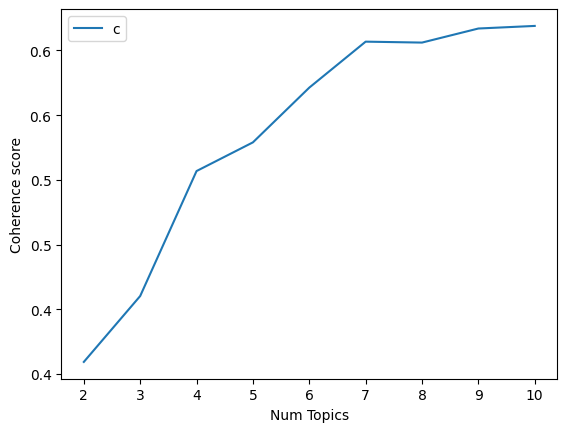

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#plot
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

formatter = FuncFormatter(lambda y, _: '{:.1f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"Optimal Number of Topics: {optimal_num_topics}")

Optimal Number of Topics: 10


In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 1))

Num Topics = 2  has Coherence Value of 0.4
Num Topics = 3  has Coherence Value of 0.4
Num Topics = 4  has Coherence Value of 0.5
Num Topics = 5  has Coherence Value of 0.5
Num Topics = 6  has Coherence Value of 0.6
Num Topics = 7  has Coherence Value of 0.6
Num Topics = 8  has Coherence Value of 0.6
Num Topics = 9  has Coherence Value of 0.6
Num Topics = 10  has Coherence Value of 0.6


In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df['bigram_trigram'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

            word  topic_id  importance  word_count
0      bea_cukai         0    0.352753        4650
1          cukai         0    0.121593        1191
2       beacukai         0    0.082394        1040
3            kpk         0    0.049480         682
4        korupsi         0    0.035371         290
5            sri         0    0.015804         340
6           cuan         0    0.015273         192
7       kekayaan         0    0.014743         162
8          audit         0    0.013743         184
9        periksa         0    0.011223         140
10        konoha         1    0.115697         506
11         korup         1    0.041566         146
12      instansi         1    0.036145         158
13        jepang         1    0.034226         116
14         palak         1    0.027590         122
15       dokumen         1    0.019133         146
16       justice         1    0.018976         120
17         lawak         1    0.016902         120
18      prosedur         1    0

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):

    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df,
                                            pd.DataFrame({'Dominant_Topic': [int(topic_num+1)],
                                                          'Perc_Contribution': [round(prop_topic, 4)],
                                                          'Topic_Keywords': [topic_keywords]})],
                                           ignore_index=True)
            else:
                break

    sent_topics_df = pd.concat([sent_topics_df, pd.Series(texts)], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    return sent_topics_df


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df['bigram_trigram'])

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               3              0.8077   
1            1               3              0.8077   
2            2               5              0.8076   
3            3               5              0.8077   
4            4               6              0.4566   
5            5               2              0.8077   
6            6               1              0.1667   
7            7               5              0.8076   
8            8               4              0.8073   
9            9               3              0.8075   

                                            Keywords  \
0  pejabat, oknum, klarifikasi, dhl, kocak, mente...   
1  pejabat, oknum, klarifikasi, dhl, kocak, mente...   
2  negara, bea, mentri, sepatu, heran, usut, bers...   
3  negara, bea, mentri, sepatu, heran, usut, bers...   
4  indonesia, maling, foto, haram, makan, gaji, s...   
5  konoha, korup, instansi, jepang, palak, dokume...   
6  bea_cukai,

In [ ]:
df_dominant_topic.to_excel('dominant_topics.xlsx', index=False)

In [ ]:
df_imp_wcount.to_csv('df_imp_wcount.csv')
!cp df_imp_wcount.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"

cp: cannot create regular file 'drive/My Drive/Colab Notebooks/LDA Indonesia/': Not a directory


In [ ]:
df_dominant_topic.to_csv('df_dominant_topic.csv')
!cp df_dominant_topic.csv "drive/My Drive/Colab Notebooks/LDA TikTok Gemastik/"

cp: cannot create regular file 'drive/My Drive/Colab Notebooks/LDA TikTok Gemastik/': Not a directory


In [ ]:
!pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136163 sha256=530d5eb80eec9b2f6f843547b53971fb5944c2ff2e7a9287a302e289621926a0
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if 1 == 1:
   LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
   with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.229378  0.215462       1        1  21.326457
1     -0.129994  0.203664       2        1  11.992487
2      0.165909 -0.096777       3        1  14.899706
3      0.139818  0.049586       4        1  20.780454
4      0.278173  0.003006       5        1  15.873298
5     -0.224527 -0.374940       6        1  15.127598, topic_info=                  Term         Freq        Total Category  logprob  loglift
12           bea_cukai  7407.000000  7407.000000  Default  30.0000  30.0000
4            indonesia  3117.000000  3117.000000  Default  29.0000  29.0000
206             negara  2449.000000  2449.000000  Default  28.0000  28.0000
16              barang  2646.000000  2646.000000  Default  27.0000  27.0000
440              cukai  2553.000000  2553.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
1280             kaget   101.484347   101.494839   Topic6  -4.9890   1.8885
2025            polisi   101.209670   101.220162   Topic6  -4.9917   1.8885
988               woii    99.302014    99.312506   Topic6  -5.0107   1.8885
503   menteri_keuangan    94.349039    94.359531   Topic6  -5.0619   1.8885
616       serah_terima    94.224894    94.235386   Topic6  -5.0632   1.8885

[221 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
196       6  0.997120     akal
2078      3  0.999286  akhirat
482       3  0.999466     alat
612       1  1.003532  anggota
368       1  1.001340    audit
...     ...       ...      ...
189       4  1.001066    wajar
284       5  1.003009    wajib
2329      5  0.998395  wakanda
2343      3  0.999863    warga
988       6  0.996853     woii

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


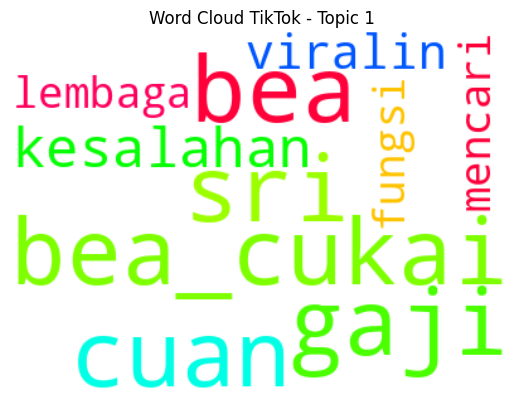

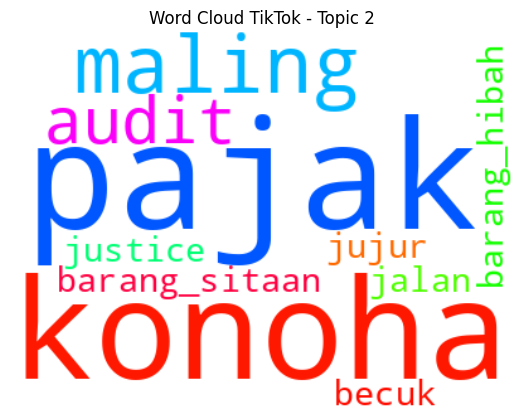

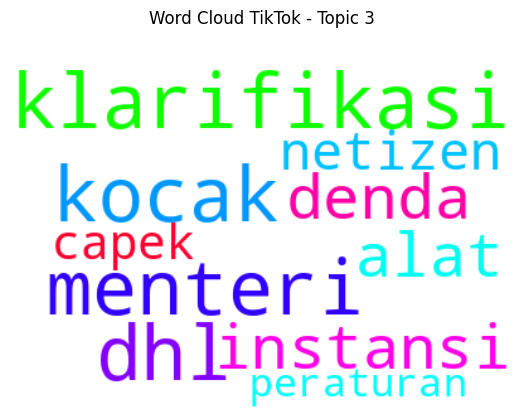

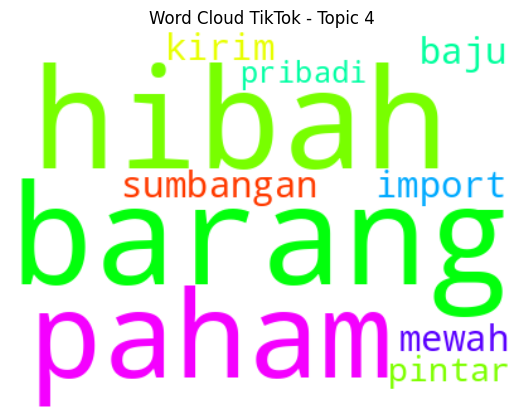

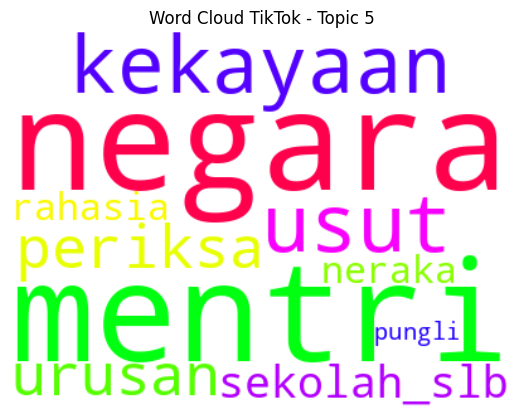

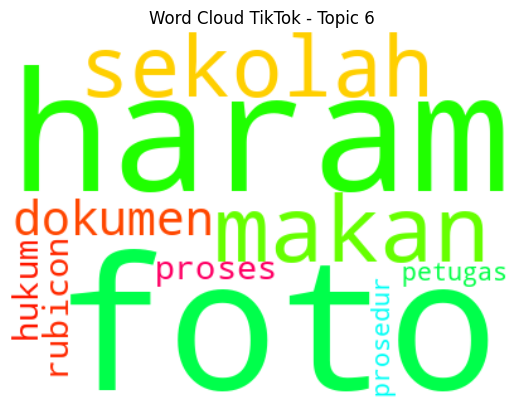

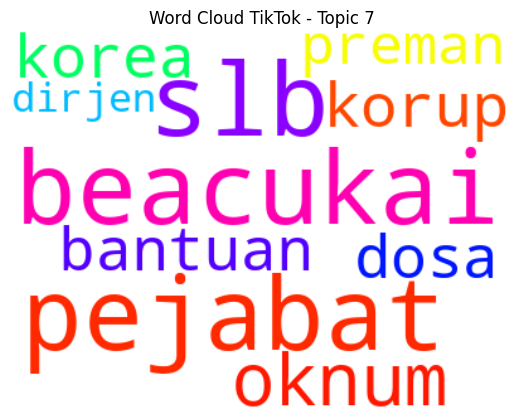

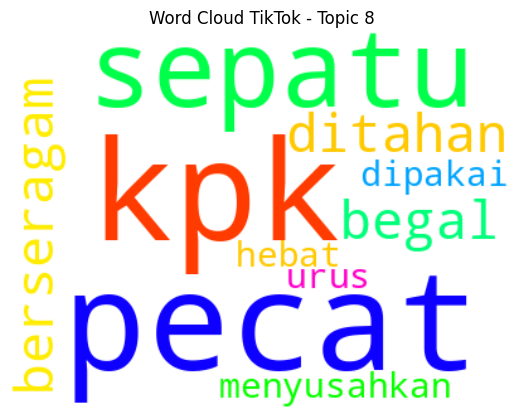

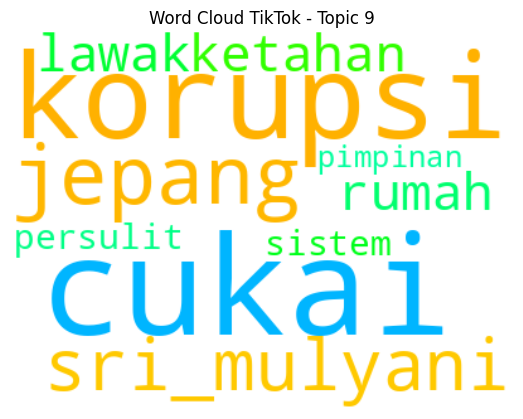

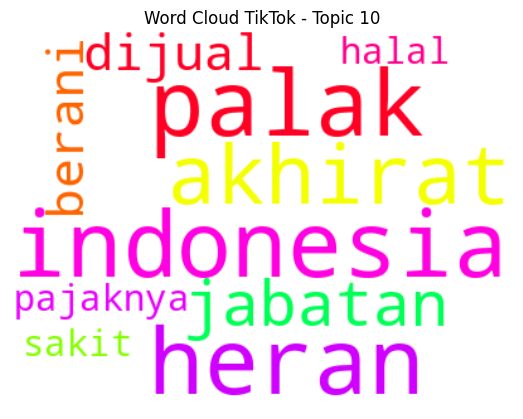

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

num_topics = 10  # Jumlah topik
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

for topic_id, topic_words in lda_model.print_topics():
    words = topic_words.split("+")
    words = [word.split("*")[1].replace('"', '').strip() for word in words]

    text = ' '.join(words)

    wordcloud = WordCloud(width=400, height=300,
                          background_color='white',
                          stopwords=None,
                          min_font_size=5,
                          colormap='hsv').generate(text)

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud TikTok - Topic {topic_id+1}")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.savefig(f"wordcloud_topic_{topic_id+1}.png", bbox_inches='tight', dpi=300)

    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


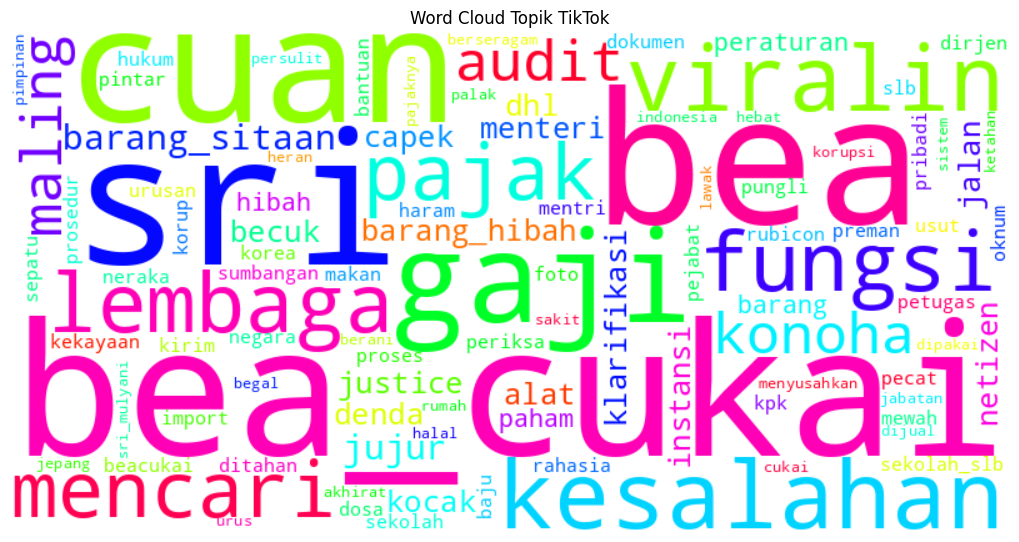

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

num_topics = 10  # Jumlah topik
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

all_topics_words = ' '.join([word for _, topic_words in lda_model.print_topics() for word in topic_words.split('+')])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='hsv').generate(all_topics_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud Topik TikTok")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-06758267d2d5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Word', y='Frequency', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dt

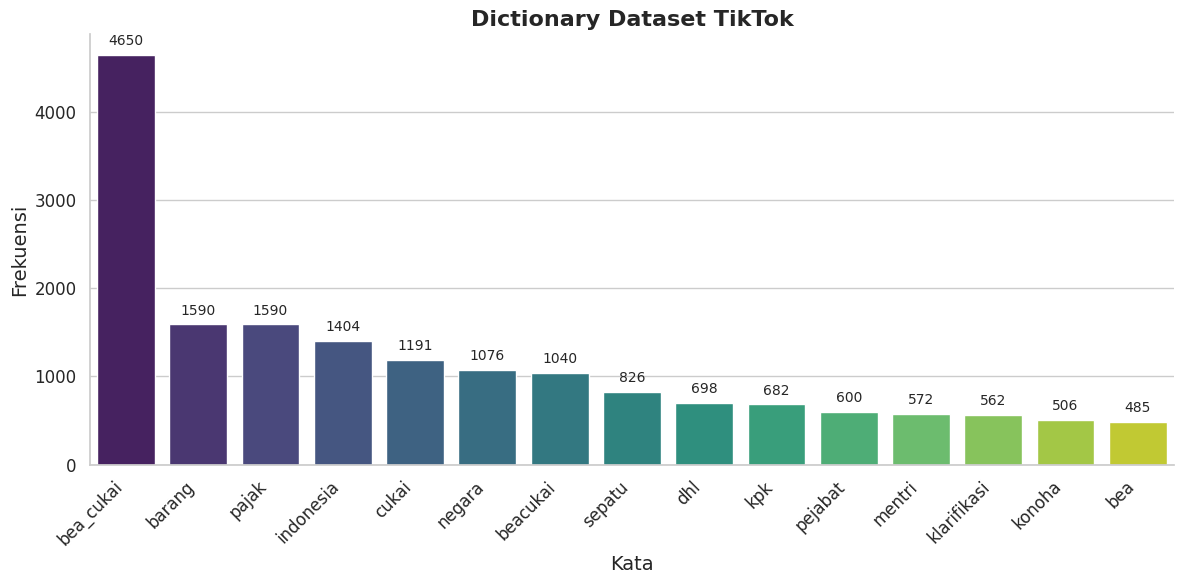

In [ ]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

with open('dictionary.gensim', 'rb') as f:
  dictionary = pickle.load(f)
word_frequencies = {dictionary[id]: freq for id, freq in dictionary.cfs.items()}
sorted_words = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)

N = 15
top_words = sorted_words[:N]
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

import pandas as pd
df = pd.DataFrame({'Word': words, 'Frequency': frequencies})

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Word', y='Frequency', data=df, palette='viridis')

plt.xlabel('Kata', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.title(f'Dictionary Dataset TikTok', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
